# Velocity-SED Public

### Choose Foundation|CSP survey 

In [1]:
import pandas as pd
import numpy as np
import pickle
from contextlib import suppress
import re
import matplotlib.pyplot as pl

##Choose which survey
mode = 'Foundation'
#mode = 'CSP'

##Choose method to split on v
v_split_method = 'median'

##Choose which frame to analyse in (Observer frame or Rest frame)
frame,mw = 'rest','nomw'#Loops through both extinguished and intrinsic

### Load up BayeSN fits + Velocity Data

In [2]:
loc = "data_public/"
DettTab1 = pd.read_csv(loc+"dettman_21_Table1.dat",sep="\s+")#Foundation results (SALT2 vs BayeSN griz)
DettTab2 = pd.read_csv(loc+"dettman_21_Table2.dat",sep="\s+")#CSP results (SALT2 vs BayeSN BVRIYJH)


def load_BayeSN_data(loadname):
    BYint = pd.read_csv(loc+loadname+".txt")
    BYint.drop('Unnamed: 0',axis=1,inplace=True)
    return BYint

def get_pair_combinations(filters):
    pairs = [filters[i]+filters[j] for i in range(len(filters)) for j in range(i+1,len(filters))]
    return pairs

#Limited bands for public version
if mode=='Foundation':
    filters = ['g','r']#,'i','z']
    vdata   = DettTab1
    BYdata  = load_BayeSN_data('foundation_bayesn_fitres')
    LRcolours = ['blue','red']
    surveyname= 'Fnd'
elif mode=='CSP':
    filters   = ['B','V']#,'R','I','Y','J','H']
    vdata     = DettTab2
    BYdata    = load_BayeSN_data('csp_bayesn_fitres')
    LRcolours = ['green','goldenrod'] 
    surveyname= 'CSP'

display(vdata)
display(BYdata)
print (vdata.columns.values)
print (BYdata.columns.values)
print (get_pair_combinations(filters))

,SN,z,vsi,vsi_err,salt2c,salt2c_err,salt2_x1,salt2_x1_err,t0,t0_err,mB,mB_err,mures,mures_err,hostM,hostM_err
0,2016afk,0.046,-12.62,0.25,0.035,0.035,-0.27,0.2,57440.77,0.25,17.48,0.04,0.12,0.15,9.77,0.16
1,2016coj,0.005,-11.95,0.22,-0.011,0.032,-1.51,0.07,57548.16,0.09,12.84,0.04,-,-,10.83,0.16
2,2016cor,0.050,-9.63,0.23,0.144,0.034,-0.57,0.28,57541.73,0.24,18.1,0.04,0.2,0.15,10.29,0.16
3,2016cvv,0.045,-12.26,0.57,0.067,0.038,1.37,0.29,57558.34,0.62,17.21,0.05,-0.0,0.17,11.1,0.16
4,2016esh,0.045,-10.45,0.22,-0.097,0.038,-1.32,0.25,57613.29,0.2,16.83,0.04,-0.25,0.16,9.94,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,PS16fbb,0.052,-10.07,0.22,-0.119,0.035,0.7,0.23,57719.61,0.21,17.26,0.04,0.14,0.16,9.38,0.16
75,PS16n,0.053,-10.14,0.23,-0.055,0.039,-0.31,0.18,57392.52,0.17,17.41,0.05,-0.0,0.16,10.33,0.16
76,PS17bii,0.073,-10.59,0.24,-0.093,0.043,-0.95,0.37,57811.77,0.36,18.08,0.05,0.0,0.17,10.69,0.16
77,PSNJ0153424,0.026,-10.51,0.22,0.072,0.031,-0.58,0.07,57393.66,0.09,16.21,0.04,-0.03,0.17,10.66,0.16


,SN,z_helio,z_helio_err,z_HD,z_HD_err,mu_ext,mu_ext_err,mu,mu_err,log_Mass,EBV_MW,T0,T0_err,AV,AV_err,theta,theta_err
0,2016afk,0.04561,0.00001,0.04686,0.00001,36.49210,0.02317,36.59705,0.12096,9.982,0.049836,57439.85,0.49,0.24262,0.06535,-0.08127,0.21765
1,2016W,0.01925,0.00007,0.02013,0.00007,34.61361,0.05446,34.47912,0.10918,11.388,0.059888,57417.95,0.20,0.22178,0.06023,1.28273,0.13634
2,ASASSN-15bc,0.03672,0.00010,0.03801,0.00010,36.02330,0.02913,36.02041,0.11290,10.187,0.037465,57047.21,0.33,0.25037,0.05533,-0.55129,0.17123
3,ASASSN-15fa,0.02735,0.00001,0.02726,0.00001,35.28384,0.03984,35.23506,0.10956,11.268,0.023600,57104.32,0.20,0.30827,0.05932,0.84735,0.17827
4,ASASSN-15fs,0.02902,0.00005,0.02925,0.00005,35.44012,0.03730,35.30712,0.11329,10.379,0.077466,57112.82,0.35,0.14008,0.05336,-0.45663,0.15046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,SN2017ms,0.02448,0.00001,0.02560,0.00001,35.14467,0.04242,35.22930,0.11531,9.415,0.008550,57782.51,0.46,0.03734,0.03225,-0.94224,0.29872
153,iPTF16auf,0.01502,0.00000,0.01532,0.00000,34.01265,0.07087,34.06177,0.11485,9.067,0.013077,57537.61,0.23,0.31222,0.05946,-0.01168,0.14445
154,Gaia16bba,0.03046,0.00009,0.02979,0.00009,35.48073,0.03703,35.41376,0.12273,8.651,0.040006,57625.65,1.10,0.12014,0.07263,-0.48731,0.20765
155,PSNJ2352371,0.02648,0.00001,0.02602,0.00001,35.18070,0.04174,35.25303,0.11822,10.851,0.035506,57285.49,0.36,0.21073,0.06363,2.57181,0.17325


['SN' 'z' 'vsi' 'vsi_err' 'salt2c' 'salt2c_err' 'salt2_x1' 'salt2_x1_err'
 't0' 't0_err' 'mB' 'mB_err' 'mures' 'mures_err' 'hostM' 'hostM_err']
['SN' 'z_helio' 'z_helio_err' 'z_HD' 'z_HD_err' 'mu_ext' 'mu_ext_err' 'mu'
 'mu_err' 'log_Mass' 'EBV_MW' 'T0' 'T0_err' 'AV' 'AV_err' 'theta'
 'theta_err']
['gr']


In [3]:
#Dettman Table 1 sometimes misses 'AT' or 'SN' prefix, this cell fixes that by renaming vdata SN column
if mode=='Foundation':
    BYSNnames   = list(BYdata['SN'].values)
    vSNnames    = list( vdata['SN'].values)
    newvSNnames = []
    for SNname in vSNnames:
        for i,SN in enumerate(BYSNnames):
            if SNname==SN[2:] or SNname==SN:
                newvSNnames.append(SN)
                break
            elif i==len(BYSNnames)-1:
                newvSNnames.append(SNname)
    vdata['SN'] = newvSNnames


In [4]:
#This Cell merges our BayeSN fits with Dettman Velocity Data, only keep rows with velocity info AND BayeSN fits
Total = BYdata.merge(vdata,on='SN',how='inner')
Total.sort_values('vsi',ascending=True,inplace=True)#Sort from 'high velocity'~-16 through to 'low velocity'~-8

#Map '-' to nans in SALT2 columns
saltcols = ['salt2c','salt2c_err','salt2_x1','salt2_x1_err','t0','t0_err','mB','mB_err','hostM','hostM_err']
if mode=='Foundation':
    saltcols.append('mures')
    saltcols.append('mures_err')
    
Total[saltcols]=Total[saltcols].replace('-',np.nan)
Total[saltcols]=Total[saltcols].astype(float)
display(Total.head())
print (Total.columns.values)


if mode=='CSP':
    print ("Removing 2006X because of anomalous apparent colours")
    Total = Total[Total['SN']!='2006X']

,SN,z_helio,z_helio_err,z_HD,z_HD_err,mu_ext,mu_ext_err,mu,mu_err,log_Mass,...,salt2_x1,salt2_x1_err,t0,t0_err,mB,mB_err,mures,mures_err,hostM,hostM_err
25,ASASSN-16hr,0.03086,0.00001,0.03097,0.00001,35.56702,0.03506,35.65947,0.13264,10.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.04,0.16
23,ASASSN-16fo,0.02890,0.00021,0.03098,0.00021,35.56774,0.03801,35.46493,0.10888,10.172,...,0.54,0.14,57540.13,0.29,15.83,0.03,0.00,0.16,10.23,0.16
36,AT2017oz,0.05569,0.00001,0.05611,0.00001,36.89803,0.01935,36.96566,0.12041,10.036,...,-0.10,0.28,57788.03,0.27,17.51,0.04,-0.08,0.16,10.04,0.16
2,ASASSN-15go,0.01892,0.00015,0.01879,0.00015,34.46179,0.06033,34.63172,0.12593,10.072,...,2.80,0.67,57122.39,0.05,15.86,0.05,NaN,NaN,NaN,NaN
49,PS16bnz,0.06270,0.00021,0.06434,0.00021,37.20819,0.01830,37.08989,0.11675,11.244,...,-1.12,0.21,57487.48,0.15,17.67,0.04,-0.04,0.16,11.66,0.16


['SN' 'z_helio' 'z_helio_err' 'z_HD' 'z_HD_err' 'mu_ext' 'mu_ext_err' 'mu'
 'mu_err' 'log_Mass' 'EBV_MW' 'T0' 'T0_err' 'AV' 'AV_err' 'theta'
 'theta_err' 'z' 'vsi' 'vsi_err' 'salt2c' 'salt2c_err' 'salt2_x1'
 'salt2_x1_err' 't0' 't0_err' 'mB' 'mB_err' 'mures' 'mures_err' 'hostM'
 'hostM_err']


### Load up pre-computed BayeSN features

In [5]:
#Creates a fresh data frame with all colour combos in int/ext dust with pre-specified frame(rest or obs) and mwdust
fpairs = get_pair_combinations(filters)
def get_tpair_list(tlist):
    pairs = [[tlist[i],tlist[j]] for i in range(len(tlist)) for j in range(len(tlist))]
    return pairs
tlist = np.arange(-10,41,1)
tpairlist = get_tpair_list(tlist)
total_colour_columns = []
for tpair in tpairlist:
    for intext in ['_int','_ext']:
        for fpair in fpairs:            
            colname = fpair+intext+'_t1_'+str(tpair[0])+'_t2_'+str(tpair[1])
            total_colour_columns.append(colname)
            total_colour_columns.append(colname+'_err')
###################################
def feature_to_tpair(column):
    pattern_time   = r't%s_([\d-]{1,3})'
    try:
        t1 = int(re.search(pattern_time%1,column).group(1))
        t2 = int(re.search(pattern_time%2,column).group(1))
        tpair = [t1,t2]
        return tpair
    except AttributeError:
        try:
            t1 = int(re.search(pattern_time%1,column).group(1))
            tpair = [t1,0]
            return tpair
        except AttributeError:
            return [0,0]
        
###################################
dustmap       = {'ext':'extinguished','int':'intrinsic'}
pattern_time   = r't%s_([\d-]{1,3})'


new_colour_df  = pd.read_pickle(loc+'%s_%s_%s_fulltlist'%(mode,frame,mw))
#new_colour_df  = pd.read_pickle('%s_%s_%s_fulltlist'%(mode,frame,mw))
#new_colour_df = new_colour_df[['SN']+total_colour_columns]
#new_colour_df.to_pickle(loc+'%s_%s_%s_fulltlistX'%(mode,frame,mw))
            
display(new_colour_df)

,SN,gr_int_t1_-10_t2_-10,gr_int_t1_-10_t2_-10_err,gr_ext_t1_-10_t2_-10,gr_ext_t1_-10_t2_-10_err,gr_int_t1_-10_t2_-9,gr_int_t1_-10_t2_-9_err,gr_ext_t1_-10_t2_-9,gr_ext_t1_-10_t2_-9_err,gr_int_t1_-10_t2_-8,...,gr_ext_t1_40_t2_38,gr_ext_t1_40_t2_38_err,gr_int_t1_40_t2_39,gr_int_t1_40_t2_39_err,gr_ext_t1_40_t2_39,gr_ext_t1_40_t2_39_err,gr_int_t1_40_t2_40,gr_int_t1_40_t2_40_err,gr_ext_t1_40_t2_40,gr_ext_t1_40_t2_40_err
0,ASASSN-16hr,-0.219932,0.106584,-0.112756,0.110661,-0.044240,0.097091,0.062759,0.100594,0.104089,...,0.895582,0.092575,0.717179,0.098375,0.802637,0.095210,0.625563,0.102274,0.710608,0.098970
1,ASASSN-16fo,-0.209260,0.109738,-0.189409,0.110297,-0.016661,0.100125,0.003163,0.100346,0.147955,...,0.682148,0.070978,0.601948,0.073045,0.617988,0.072919,0.539012,0.076304,0.555003,0.075948
2,AT2017oz,-0.112355,0.111413,-0.074617,0.109082,0.082226,0.103445,0.119930,0.100725,0.248851,...,0.779342,0.102701,0.709424,0.107411,0.739892,0.105697,0.672224,0.113223,0.702566,0.110933
3,ASASSN-15go,-0.224738,0.112126,0.038953,0.117885,-0.052265,0.100972,0.211323,0.104660,0.092915,...,1.002764,0.109973,0.714717,0.109093,0.926029,0.111607,0.640604,0.114892,0.850751,0.115773
4,PS16bnz,-0.230592,0.076212,-0.215901,0.073097,-0.004163,0.071443,0.010543,0.068148,0.193420,...,0.724903,0.112367,0.689350,0.116153,0.701590,0.115196,0.668820,0.120721,0.681028,0.119671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,PS15ahs,-0.140086,0.044017,-0.117820,0.040273,0.052072,0.041651,0.074342,0.037757,0.215964,...,0.582217,0.087302,0.537398,0.093652,0.555640,0.093602,0.513041,0.101345,0.531213,0.101262
68,SN2017ciy,0.255844,0.122662,0.491365,0.124561,0.367810,0.109234,0.602751,0.110798,0.452615,...,0.686304,0.088348,0.479168,0.093681,0.676889,0.090339,0.471833,0.097353,0.669588,0.093541
69,ATLAS16bwu,-0.132268,0.129293,-0.044872,0.135027,0.056198,0.116200,0.143528,0.120922,0.216797,...,0.990218,0.111042,0.879357,0.113883,0.950757,0.115778,0.842206,0.120250,0.913607,0.121961
70,ASASSN-15np,-0.163413,0.126991,-0.076065,0.132444,0.058260,0.114116,0.145638,0.118733,0.251420,...,0.806485,0.116635,0.717684,0.122474,0.790073,0.121319,0.704490,0.128822,0.776623,0.127380


In [6]:
def get_tpair_list_for_singleband_declines(tlist):
    pairs = [[tlist[i],tlist[j]] for i in range(len(tlist)) for j in range(len(tlist)) if i<j]
    return pairs
tpairlist = get_tpair_list_for_singleband_declines(tlist)
total_mag_columns = []
for intext in ['_int','_ext']:
    for mag in filters:
        for t in tlist:
            total_mag_columns.append('M_'+mag[0]+'_LCDM'+intext+'_t1_'+str(t))
            total_mag_columns.append('M_'+mag[0]+'_LCDM'+intext+'_t1_'+str(t)+'_err')
            total_mag_columns.append('M_'+mag[0]+'_BYSN'+intext+'_t1_'+str(t))
            total_mag_columns.append('M_'+mag[0]+'_BYSN'+intext+'_t1_'+str(t)+'_err')
        for tpair in tpairlist:
            for appender in ['','_err']:
                total_mag_columns.append('DM_'+mag[0]+intext+'_t1_'+str(tpair[0])+'_t2_'+str(tpair[1])+appender)

new_mag_df  = pd.read_pickle(loc+'%s_%s_%s_fulltlist_mags'%(mode,frame,mw))
#new_mag_df  = pd.read_pickle('%s_%s_%s_fulltlist_mags'%(mode,frame,mw))
#new_mag_df = new_mag_df[['SN']+total_mag_columns]
#new_mag_df.to_pickle(loc+'%s_%s_%s_fulltlist_magsX'%(mode,frame,mw))
#print (total_mag_columns)
new_mag_df

,SN,M_g_LCDM_int_t1_-10,M_g_LCDM_int_t1_-10_err,M_g_BYSN_int_t1_-10,M_g_BYSN_int_t1_-10_err,M_g_LCDM_int_t1_-9,M_g_LCDM_int_t1_-9_err,M_g_BYSN_int_t1_-9,M_g_BYSN_int_t1_-9_err,M_g_LCDM_int_t1_-8,...,DM_r_ext_t1_37_t2_39,DM_r_ext_t1_37_t2_39_err,DM_r_ext_t1_37_t2_40,DM_r_ext_t1_37_t2_40_err,DM_r_ext_t1_38_t2_39,DM_r_ext_t1_38_t2_39_err,DM_r_ext_t1_38_t2_40,DM_r_ext_t1_38_t2_40_err,DM_r_ext_t1_39_t2_40,DM_r_ext_t1_39_t2_40_err
0,ASASSN-16hr,-18.513377,0.146103,-18.657758,0.152356,-18.699675,0.137374,-18.844056,0.144267,-18.858132,...,0.190661,0.021030,0.282690,0.031852,0.092945,0.010660,0.184974,0.021484,0.092029,0.010824
1,ASASSN-16fo,-18.521397,0.117753,-18.493124,0.140248,-18.725237,0.107760,-18.696964,0.132612,-18.900946,...,0.134090,0.017537,0.197075,0.026604,0.064159,0.008913,0.127144,0.017982,0.062985,0.009069
2,AT2017oz,-18.269604,0.114058,-18.315268,0.148108,-18.484615,0.105044,-18.530279,0.140570,-18.671266,...,0.086191,0.030591,0.123518,0.046351,0.039449,0.015522,0.076776,0.031285,0.037326,0.015764
3,ASASSN-15go,-18.601663,0.193792,-18.679362,0.201819,-18.780068,0.181949,-18.857766,0.190028,-18.930784,...,0.158815,0.033401,0.234093,0.050574,0.076735,0.016947,0.152013,0.034123,0.075278,0.017177
4,PS16bnz,-18.224795,0.072659,-18.124558,0.129408,-18.442735,0.066461,-18.342498,0.125977,-18.632249,...,0.055116,0.026477,0.075678,0.040229,0.023314,0.013476,0.043876,0.027229,0.020562,0.013754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,PS15ahs,-18.301688,0.070472,-18.380886,0.122015,-18.503907,0.068376,-18.583105,0.120669,-18.677836,...,0.060910,0.025070,0.085337,0.037967,0.026577,0.012693,0.051005,0.025590,0.024428,0.012897
68,SN2017ciy,-18.527708,0.160602,-18.529019,0.168170,-18.727178,0.148439,-18.728488,0.156329,-18.898210,...,0.026257,0.019609,0.033557,0.029802,0.009415,0.009987,0.016715,0.020181,0.007301,0.010194
69,ATLAS16bwu,-18.340152,0.161411,-18.283289,0.177240,-18.543155,0.149096,-18.486292,0.166077,-18.718066,...,0.085979,0.025429,0.123129,0.038597,0.039461,0.012909,0.076610,0.026079,0.037150,0.013170
70,ASASSN-15np,-17.967095,0.166266,-18.011332,0.174270,-18.190742,0.153799,-18.234979,0.162405,-18.385988,...,0.041410,0.026292,0.054860,0.039873,0.016412,0.013340,0.029862,0.026923,0.013450,0.013584


In [7]:
new_colour_df  = pd.read_pickle(loc+'%s_%s_%s_fulltlist'%(mode,frame,mw))
#newTotal = Total.merge(new_colour_df,on='SN',how='inner')

new_mag_df  = pd.read_pickle(loc+'%s_%s_%s_fulltlist_mags'%(mode,frame,mw))
#newTotal = Total.merge(new_mag_df,on='SN',how='inner')

colours_mags = new_colour_df.merge(new_mag_df,on='SN',how='inner')


newTotal = Total.merge(colours_mags,on='SN',how='inner')

In [8]:
Total=newTotal.copy()
Total

,SN,z_helio,z_helio_err,z_HD,z_HD_err,mu_ext,mu_ext_err,mu,mu_err,log_Mass,...,DM_r_ext_t1_37_t2_39,DM_r_ext_t1_37_t2_39_err,DM_r_ext_t1_37_t2_40,DM_r_ext_t1_37_t2_40_err,DM_r_ext_t1_38_t2_39,DM_r_ext_t1_38_t2_39_err,DM_r_ext_t1_38_t2_40,DM_r_ext_t1_38_t2_40_err,DM_r_ext_t1_39_t2_40,DM_r_ext_t1_39_t2_40_err
0,ASASSN-16hr,0.03086,0.00001,0.03097,0.00001,35.56702,0.03506,35.65947,0.13264,10.045,...,0.190661,0.021030,0.282690,0.031852,0.092945,0.010660,0.184974,0.021484,0.092029,0.010824
1,ASASSN-16fo,0.02890,0.00021,0.03098,0.00021,35.56774,0.03801,35.46493,0.10888,10.172,...,0.134090,0.017537,0.197075,0.026604,0.064159,0.008913,0.127144,0.017982,0.062985,0.009069
2,AT2017oz,0.05569,0.00001,0.05611,0.00001,36.89803,0.01935,36.96566,0.12041,10.036,...,0.086191,0.030591,0.123518,0.046351,0.039449,0.015522,0.076776,0.031285,0.037326,0.015764
3,ASASSN-15go,0.01892,0.00015,0.01879,0.00015,34.46179,0.06033,34.63172,0.12593,10.072,...,0.158815,0.033401,0.234093,0.050574,0.076735,0.016947,0.152013,0.034123,0.075278,0.017177
4,PS16bnz,0.06270,0.00021,0.06434,0.00021,37.20819,0.01830,37.08989,0.11675,11.244,...,0.055116,0.026477,0.075678,0.040229,0.023314,0.013476,0.043876,0.027229,0.020562,0.013754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,PS15ahs,0.02551,0.00004,0.02529,0.00004,35.11771,0.04307,35.19122,0.11233,10.068,...,0.060910,0.025070,0.085337,0.037967,0.026577,0.012693,0.051005,0.025590,0.024428,0.012897
68,SN2017ciy,0.03765,0.00105,0.03843,0.00105,36.04784,0.06571,36.01274,0.11764,10.215,...,0.026257,0.019609,0.033557,0.029802,0.009415,0.009987,0.016715,0.020181,0.007301,0.010194
69,ATLAS16bwu,0.07180,0.00006,0.07236,0.00006,37.47575,0.01511,37.38666,0.13274,10.194,...,0.085979,0.025429,0.123129,0.038597,0.039461,0.012909,0.076610,0.026079,0.037150,0.013170
70,ASASSN-15np,0.03768,0.00005,0.03886,0.00005,36.07270,0.02808,36.07736,0.12522,10.122,...,0.041410,0.026292,0.054860,0.039873,0.016412,0.013340,0.029862,0.026923,0.013450,0.013584


In [9]:
#This Cell splits by v_split_method
def get_split(X,Y,v_split_method):
    if v_split_method =='median':
        #return X.median(),X<=X.median(),X>X.median()#More SNe on v_high side
        #return X.median(),X<X.median(),X>=X.median()#More SNe on v_low  side
        try:
            Nmedian_occurrences = X[X==X.median()].shape[0]
        except:
            Nmedian_occurrences = 0
        #if Nmedian_occurrences%2==0:
        #    print ("Number of times median occurs is even:",Nmedian_occurrences,"- thus expect odd/even sub-samples")
        return X.median(),X<X.median(),X>X.median()#Here we should always have an even split of sub-samples


### Plotting + Formatting Cells

In [10]:
#Outdated cell for rounding lopsided errors, surplus to req
def ultimate_format(pval,plowerr,puperr):
    power='n'
    if plowerr==puperr and plowerr==0:#Simply for rounding a single number to 1sigfig
        floor=int(np.floor(np.log10(abs(pval))))
        if floor<-2:
            power='y'
        return str(round(pval,-floor)),str(0),str(0),floor,str(power)
    def round_to_1sigfig(pval,plowerr,puperr):
        for _ in range(2):#because e.g. 0.0099->0.01 and floor =-3 -> -2
            floormean,floorlo,floorup = int(np.floor(np.log10(abs(pval)))),int(np.floor(np.log10(abs(plowerr)))),int(np.floor(np.log10(abs(puperr))))#Ask decimal places of 1st sig fig
            maxsig  = max(-floorlo,-floorup,-floormean)
            plowerr = round(plowerr,maxsig)
            puperr  = round(puperr ,maxsig)
            pval    = round(pval   ,maxsig)
        return_list = [floormean,floorlo,floorup] 
        for x in [pval,plowerr,puperr]:
            if x==int(x) and int(np.floor(np.log10(abs(x))))>=0:#maxsig:
                return_list.append(int(x))
            else:
                return_list.append(x)
                
        return return_list
        #return floormean,floorlo,floorup,pval,plowerr,puperr
    
    floormean,floorlo,floorup,pval,plowerr,puperr = round_to_1sigfig(pval,plowerr,puperr)[:]
    #Now we ask if mean is too small, we wish to scale up for readability 
    if floormean <-2:#Here we multiply everything up by powers of 10 for readability, and correct for integers
        power10,power = floormean,'y'
        pval,plowerr,puperr = float(pval)/10**(power10),float(plowerr)/10**(power10),float(puperr)/10**(power10)
        floormean,floorlo,floorup,pval,plowerr,puperr = round_to_1sigfig(pval,plowerr,puperr)[:]
    ##########Here we correct for fact rounded mo could have less sig fig owing to zeros
    def append_zeros(floormean,pval,floorlo,floorup):#First two are variables,second two are fixed
        try:
            lenstrmo,strmo,signmo,mo = len(str(pval).split('.')[-1]),str(pval),pval/(abs(pval)),pval
        except ZeroDivisionError:#Happens when pval=0.0
            lenstrmo,strmo,signmo,mo = len(str(pval).split('.')[-1]),str(pval),pval,pval
        #print (floorlo,floorup,floormean)
        if min(floorlo,floorup)<floormean and min(floorlo,floorup)<0:
            if strmo.count('.')==0:
                strmo+='.'
            while len(strmo.split('.')[-1])<-min(floorlo,floorup):
                strmo += '0'
            #if signmo==-1:
            #    strmo ='-'+strmo
            pval = strmo
        return pval      #(var_floor,var_p  ,  fixed,  fixed)
    pval    = append_zeros(floormean,pval   ,floorlo,floorup)#Adds zeros to mean
    plowerr = append_zeros(floorlo  ,plowerr,floorlo,floorup)#Uperr
    puperr  = append_zeros(floorup  ,puperr ,floorlo,floorup)#Loerr
    if power=='n':
        power10=0
    #print (str(pval),str(plowerr),str(puperr),power10,str(power))
    return str(pval),str(plowerr),str(puperr),power10,str(power)

def create_string(plist):
    pval,plowerr,puperr,power10,power = plist[:]
    #print (pval,plowerr,puperr,power10,power)
    #print (type(pval),type(plowerr),type(puperr),type(power10),type(power))
    if power=='n':
        if plowerr==puperr:
            if plowerr!=str(0):
                return pval+'\pm'+plowerr
            else:
                return pval
        else:
            return pval+'_{-%s}^{+%s}'%(plowerr,puperr)
    else:
        if plowerr==puperr:
            if plowerr!=str(0):
                return '('+pval+'\pm'+plowerr+') \, 10^{%s}'%power10
            else:#For when it's just a single number
                return str(int(float(pval)/10**(power10)))+'\cdot 10^{%s}'%power10
        
        else:
            return pval+'_{-%s}^{+%s}'%(plowerr,puperr)+'\,10^{%s}'%power10

In [11]:
#In this cell we can compute raw p-values of a feature
from scipy.stats import ks_2samp,anderson,anderson_ksamp
import copy
from contextlib import suppress

def compute_pks_raw(X,Y,v_split_method,pformat='n'):
    vsplit,lmask,rmask = get_split(X,Y,v_split_method)
    Y1,Y2       = Y[lmask],Y[rmask]
    pks,pad     = ks_2samp(Y1,Y2)[1], anderson_ksamp([Y1,Y2])[2]
    if pformat=='n':
        return pks,pad
    if pformat=='y':
        pks,pad = create_string(list(ultimate_format(pks,0,0))),create_string(list(ultimate_format(pad,0,0)))
        return pks,pad

In [12]:
#This is a plotting cell
from matplotlib.gridspec import GridSpec

def begin_gridspec():
    fig = pl.figure(figsize=(12,8))
    gs = GridSpec(4,4)
    gs.tight_layout(fig)
    gs.update(wspace=0,hspace=0)
    ax_joint  = fig.add_subplot(gs[1:4,0:3])
    ax_marg_x = fig.add_subplot(gs[0,0:3],sharex=ax_joint)
    ax_marg_y = fig.add_subplot(gs[1:4,3],sharey=ax_joint)
    return fig,gs,ax_joint,ax_marg_x,ax_marg_y

def end_gridspec(Rx1,Rx2,Ry1,Ry2,fig,gs,ax_joint,ax_marg_x,ax_marg_y):
    Rx,Ry = [min(Rx1[0],Rx2[0]),max(Rx1[1],Rx2[1])],[min(Ry1[0],Ry2[0]),max(Ry1[1],Ry2[1])]
    ax_marg_y.set_ylim(Ry)
    ax_marg_x.set_xlim(Rx)

def get_plot_ranges(Dataset):#Function Simply Finds x,y ranges
    Nsig = 1.5
    xmin,xmax = np.amin(Dataset[0]-Nsig*Dataset[1]),np.amax(Dataset[0]+Nsig*Dataset[1])
    ymin,ymax = np.amin(Dataset[2]-Nsig*Dataset[3]),np.amax(Dataset[2]+Nsig*Dataset[3])
    Rangesx,Rangesy = [xmin,xmax],[ymin,ymax]
    return Rangesx,Rangesy

def get_y_labels(feature):#Maps a column name to an axis label and a legend label
    if feature[2:6] in ['_int','_ext'] and feature[:2]!='mu':
        Labely = r'$BayeSN$ %s Colour (Rest-Frame) [mag]'%{'int':'Intrinsic','ext':'Apparent'}[feature[3:6]]
        LegLab = r'$%s-%s$'%(feature[0],feature[1])
    elif feature[:5]=='salt2':
        Labely = r'$SALT2$ %s [mag]'%{'c':'Colour','_x1':'Stretch'}[feature[5:]]
        LegLab = r'$%s$'%{'c':'c','_x1':'x_{1}'}[feature[5:]]
    elif feature=='theta':
        Labely = r'$\theta_{BayeSN}$'
        LegLab = r'$\theta$'
    elif feature=='AV':
        Labely = r'$A_{V}$'
        LegLab = Labely
    else:#We are dealing with Single Band Stuff
        try:
            ###
            pattern_intext = r'(.+)_(int|ext)(.*)'
            pattern_band   = r'(M|DM)_(\w)_(\w{3,4})_'
            pattern_time   = r't%s_([\d-]{1,3})'
            ###
            intext           = re.match(pattern_intext,feature).group(2)
            MorDM,Band,Mtype = re.match(pattern_band,feature).groups()[:]
            t1               = re.search(pattern_time%1,feature).group(1)
            if MorDM=='M':
                LegLab = r'$M$'#%(Band)
                if Mtype=='LCDM':
                    Labely = r'$m^{%s}_{%s}(%s)-\hat{\mu}_{\Lambda CDM}(z_{CMB})$ (Rest-Frame) [mag]'%(intext,Band,t1)
                if Mtype=='BYSN':
                    Labely = r'$m^{%s}_{%s}(%s)-\hat{\mu}_{BayeSN}$ (Rest-Frame) [mag]'%(intext,Band,t1)
            elif MorDM=='DM':
                t2     = re.search(pattern_time%2,feature).group(1)
                LegLab = r'$\Delta m$'#%(Band)
                if t1!='0':
                    Labely = r'$\Delta m^{%s}_{%s;%s}(%s)$ (Rest-Frame) [mag]'%(intext,t1,t2,Band)
                else:
                    Labely = r'$\Delta m^{%s}_{%s}(%s)$ (Rest-Frame) [mag]'%(intext,t2,Band)
        except:#Really no match
            Labely = feature
            LegLab = feature

    return Labely,LegLab

def get_swap_legendlabels(feature):
    if feature[2:6] in ['_int','_ext'] and feature[:2]!='mu':
        LegLab = r'%s-%s'%(feature[0],feature[1])
        LegMap = {0:r'%s_{red}'%LegLab,1:r'%s_{blue}'%LegLab}
    elif feature[:5]=='salt2':
        if feature[5:]=='c':
            LegMap = {0:r'c_{red}',1:r'c_{blue}'}
        if feature[5:]=='_x1':
            LegMap = {0:r'x_{1;High}',1:r'x_{1;Low}'}
    elif feature=='AV':
        LegMap = {0:r'A_{V;High}',1:r'A_{V;Low}'}
    elif feature[:2]=='M_':
        LegMap = {0:r'M_{Dim}',1:r'M_{Bright}'}
    elif feature[:3]=='DM_':
        LegMap = {0:r'\Delta m_{Fast}',1:r'M_{Slow}'}
    else:
        LegMap = {0:r'_{High}',1:r'_{Low}'}
    return LegMap

def unitmap(feature):
    if feature[2:6] in ['_int','_ext'] and feature[:2]!='mu':
        return 'mag'
    elif feature[:5]=='salt2':
        if feature[5:]=='c':
            return 'mag'
        if feature[5:]=='_x1':
            return ''
    elif feature[:2]=='M_' or feature[:2]=='DM':
        return 'mag'
    else:
        return ''

def get_counts_bins(x,vsplit,swapaxes,feature):#For creating shared histogram, size is fine tuned for params
    size,mini_d = 0.5, 0#1e-10 Here the +1e-10 is suited for when we have higher sample on v_high, but we have chosen to split precisely on the median and exclude median data point if it exists, so mini_d=0 is fine
    MidBin = vsplit+mini_d#mini_d ensures everythings on the correct side e.g. when N==odd, majority on left (I think)
    counts,bins = np.histogram(x,bins=int(12/size),range=(MidBin-9,MidBin+3))
    if swapaxes=='y':
        size=0.05
        if feature=='salt2_x1':
            size=0.25
        if feature[4:8] in ['LCDM','BYSN']:
            size=0.1
        if feature[:2]=='DM':
            size=np.std(x)/2
        Nl,Nr = int((MidBin - np.amin(x))/size)+20 ,int((np.amax(x)-MidBin)/size)+20
        counts,bins = np.histogram(x,bins=Nl+Nr,range=(MidBin-Nl*size,MidBin+Nr*size))
    return counts,bins

def Gaussian(mean,sigma,free): return ((2*np.pi*sigma**2)**-0.5)*np.exp(-0.5*((mean-free)/sigma)**2)
def get_KDE(Y, Ntest):#Y are the samples, Ntest is length of grid of evenly spaced points
    N,sigma = len(Y),np.std(np.asarray(Y))
    bw      = ((4*sigma**5)/(3*N))**(1/5)
    x       = np.linspace(np.amin(Y)-5*bw,np.amax(Y)+5*bw,Ntest)
    KDE     = np.zeros(Ntest)
    for y in Y:
        KDE += Gaussian(y,bw,x)/len(Y)
    return x,KDE

def find_sig_indices(xtest,KDE,sigma_mean_lower,sigma_mean_upper,mode_loc,mode_loc_index):
    for ix,xt in enumerate(xtest[:mode_loc_index][::-1]):
        truei = mode_loc_index-ix-1
        if xtest[mode_loc_index]-xt>=sigma_mean_lower:
            siglomean = truei
            break
    for ix,xt in enumerate(xtest[mode_loc_index:]):
        truei = mode_loc_index+ix
        if xt-xtest[mode_loc_index]>=sigma_mean_upper:
            sigupmean = truei
            break
    return siglomean,sigupmean

def get_aesthetic_KDE_MCsmoothed(Nmc,Ntest,y,yerr):
    xtest,KDE = get_KDE(y,Ntest)[0],0
    for i in range(Nmc):
        Ymc  = np.random.normal(y,yerr)
        KDE += get_KDE(Ymc,Ntest)[1]/Nmc
    mean_loc,sigma_upper,sigma_lower = np.average(y),np.std(y)/np.sqrt(len(y)),np.std(y)/np.sqrt(len(y))
    curve          = abs(xtest-mean_loc)
    mean_loc_index =  (curve.tolist()).index(np.amin(np.asarray(curve)))
    siglomean,sigupmean = find_sig_indices(xtest,KDE,sigma_lower,sigma_upper,mean_loc,mean_loc_index)
    return xtest,KDE,siglomean,sigupmean,mean_loc,mean_loc_index,sigma_lower,sigma_upper

def get_Nsig_using_sigmaupperlower(moslsu):
        Z          = abs(moslsu[0][0]-moslsu[1][0])
        means      = [moslsu[0][0],moslsu[1][0]]
        high_index = means.index(np.amax(means))
        low_index  = abs(high_index-1)
        alphaZ     = (moslsu[high_index][1]**2+moslsu[low_index][2]**2)**0.5
        Nsig = Z/alphaZ
        return Nsig


def plot_velocity_feature(Total,feature,swapaxes,LRcolours):
    Data=Total.copy()#Define X and Y
    if Data[feature].hasnans:#or Data[feature+'_err'].hasnans#No longer works because _err not on end of str
        #print ("Need to remove NaNs here")
        Data=Data.dropna(axis=0)
    fig,gs,ax_joint,ax_marg_x,ax_marg_y = begin_gridspec()#Setup GridSpec
    pl.gcf().text(0.71, 0.85, str(r'%s')%(mode), fontsize=14,color='black',weight='bold')#Plot Survey Name
    
    
    
    X,Y,Xerr,Yerr = Data['vsi'],Data[feature],Data['vsi_err'],Data[feature+'_err']
    Labelx=r'$v_{Si}\,[10^{3} km\,s^{-1}$]'
    Labely,LegLab = get_y_labels(feature)
    LegMap = {0:'v_{N}',1:'v_{H}'}
    
    
    if swapaxes=='y':#If we wish to test velocity dists instead
        def swap_xy(X,Xerr,Y,Yerr,Labelx,Labely): return Y,Yerr,X,Xerr,Labely,Labelx
        X,Xerr,Y,Yerr,Labelx,Labely = swap_xy(X,Xerr,Y,Yerr,Labelx,Labely)
        LegLab = 'v'
        LegMap = get_swap_legendlabels(feature)
        LRcolours = LRcolours[::-1]
    
        
    vsplit,lmask,rmask = get_split(X,Y,v_split_method) 
    Rangesx,Rangesy    = get_plot_ranges([X,Xerr,Y,Yerr])
    FS,alph=18,0.5

    moslsu = []
    for im,mask in enumerate([rmask,lmask]):
        #Plot Data
        x,xerr,y,yerr = X[mask],Xerr[mask],Y[mask],Yerr[mask]
        ax_joint.errorbar(x,y,xerr=xerr,yerr=yerr,color=LRcolours[im],marker=['s','o'][im],markersize=5, linestyle='none',capsize=5,alpha=alph,label=LegLab+r'$(%s)$'%LegMap[im])
        
        #Plot Histogram
        counts,bins = get_counts_bins(x,vsplit,swapaxes,feature)
        ax_marg_x.hist(bins[:-1],bins,alpha=alph,weights=counts,color=LRcolours[im],edgecolor=LRcolours[im])
        ax_marg_x.step(bins[1:],counts, c='black')
        #Hist Text
        xoff,yoff=0,0#Can be altered depending on feature
        pl.gcf().text(xoff+0.15, yoff+0.79-im*0.03, str(r'$N$'+r'$(%s)$'%LegMap[im]+' = %s / %s (%s)'%(len(x),len(X),len(vdata))), fontsize=14,color=LRcolours[im],weight='bold')
        
        
        #Plot KDE; KDE is smoothed by MC error bars, purely for graphic purposes
        #Mean and error here ignores error bars, simply mean(feature) and std(feature)/root(N)
        Nmc,Ntest = 1000,1000#Nmc==N random samples to smooth KDE by,size of KDE 1D grid
        xtest,KDE,siglomean,sigupmean,mean_loc,mean_loc_index,sigma_lower,sigma_upper = get_aesthetic_KDE_MCsmoothed(Nmc,Ntest,y,yerr)
        ax_marg_y.fill_betweenx(xtest[siglomean:sigupmean],np.zeros(sigupmean-siglomean),KDE[siglomean:sigupmean],color=LRcolours[im],alpha=0.2)
        ax_marg_y.plot([0,KDE[mean_loc_index]],[mean_loc,mean_loc],c=LRcolours[im])
        ax_marg_y.plot(KDE,xtest,c=LRcolours[im])
        
        #Text on mean Feature
        #print ("In future our mean estimates could encompass a distribution from MC or MCMC datasets")
        moslsu.append([mean_loc,sigma_lower,sigma_upper])
        #print (mean_loc,sigma_lower,sigma_upper)
        #mo,sl,su,power10,power = ultimate_format(mean_loc,sigma_lower,sigma_upper)
        #print (mo,sl,su)
        #mo,sl,su               = round(mean_loc,2),round(sigma_lower,2),round(sigma_upper,2)
        meanstr                 = create_string(list(ultimate_format(mean_loc,sigma_lower,sigma_upper)))
        if swapaxes!='y':
            pl.gcf().text(0.71, 0.82-im*0.03, str(r'$\langle $%s$ \rangle (%s) = %s$')%(LegLab,LegMap[im],meanstr), fontsize=14,color=LRcolours[im])#,weight='bold')
        else:
            def meanmap(feature):
                if feature[2:6] in ['_int','_ext','lt2c'] and feature[:2]!='mu':
                    return 'c'+LegMap[im][3:]
                #elif feature[5:]=='_x1':
                else:
                    return LegMap[im]
               
            pl.gcf().text(0.71, 0.82-im*0.03, str(r'$\langle v \rangle (%s) = %s$')%(meanmap(feature),meanstr), fontsize=14,color=LRcolours[im])#,weight='bold')
    
    #Nsig of means
    Nsig = get_Nsig_using_sigmaupperlower(moslsu)
    pl.gcf().text(0.71, 0.76, str(r'$N_{sig} \simeq %s \sigma$')%(round(abs(Nsig),2)), fontsize=14,color='black',weight='bold')
    
    #Display raw p_values
    pks_raw,pad_raw = compute_pks_raw(X,Y,v_split_method,pformat='y')
    pl.gcf().text(0.71, 0.73, str(r'$p_{KS;Raw}$(%s)$ = %s$')%(LegLab,pks_raw), fontsize=14,color='black')
    pl.gcf().text(0.71, 0.70, str(r'$p_{AD;Raw}$(%s)$ = %s$')%(LegLab,pad_raw), fontsize=14,color='black')
    
    
    #Split Text
    vsplitmap = {'median':'median','search':'optimum'}
    if swapaxes!='y':
        pl.gcf().text(0.15+xoff, yoff+0.82, str(r'$v_{%s;%s}$ = $\mathbf{%s}$ $10^{3}\,km\,s^{-1}$'%(vsplitmap[v_split_method],surveyname,round(vsplit,1))), fontsize=14,color='black')#,weight='bold')        
    else:
        pl.gcf().text(0.15+xoff, yoff+0.82, str(r'%s$_{%s;%s}$ = $\mathbf{%s}$ %s'%(get_y_labels(feature)[1],vsplitmap[v_split_method],surveyname,round(vsplit,2),unitmap(feature))), fontsize=14,color='black')
    
    with suppress(IndexError):
        tpair = feature_to_tpair(feature)
        if tpair[0]!=0 or tpair[1]!=0:
            if feature[:2]!='DM' and feature[2]=='_':
                pl.gcf().text(0.15+xoff, yoff+0.73, r'$(t_{%s},t_{%s})$=(%s,%s)$\,d$'%(feature[0],feature[1],tpair[0],tpair[1]), fontsize=14,color='black',weight='bold')
            elif feature[:2]=='DM':
                pl.gcf().text(0.15+xoff, yoff+0.73, r'$(t_{1},t_{2})$=(%s,%s)$\,d$'%(tpair[0],tpair[1]), fontsize=14,color='black',weight='bold')
            else:
                pl.gcf().text(0.15+xoff, yoff+0.73, r'$(t_{L},t_{R})$=(%s,%s)$\,d$'%(tpair[0],tpair[1]), fontsize=14,color='black',weight='bold')
    
    ax_joint.plot([vsplit,vsplit],Rangesy,c='black',linestyle='--',alpha=0.5)
    ax_joint.set_ylabel(Labely,fontsize=FS)
    ax_joint.set_xlabel(Labelx,fontsize=FS)
    ax_joint.tick_params(labelsize=15)
    ax_joint.legend(fontsize=15,framealpha=0.5)
    
    ax_marg_x.get_yaxis().set_visible(False)
    ax_marg_x.set_xlim(Rangesx)
    ax_marg_y.get_xaxis().set_visible(False)
    ax_marg_y.set_ylim(Rangesy)
    
    pl.setp(ax_marg_x.get_xticklabels(), visible=False)
    pl.setp(ax_marg_y.get_yticklabels(), visible=False)
    
    end_gridspec(Rangesx,Rangesx,Rangesy,Rangesy,fig,gs,ax_joint,ax_marg_x,ax_marg_y)
    #pl.savefig("/PATH/TO/DIR/"+saveword)
    pl.show()

### Plot feature of choice here

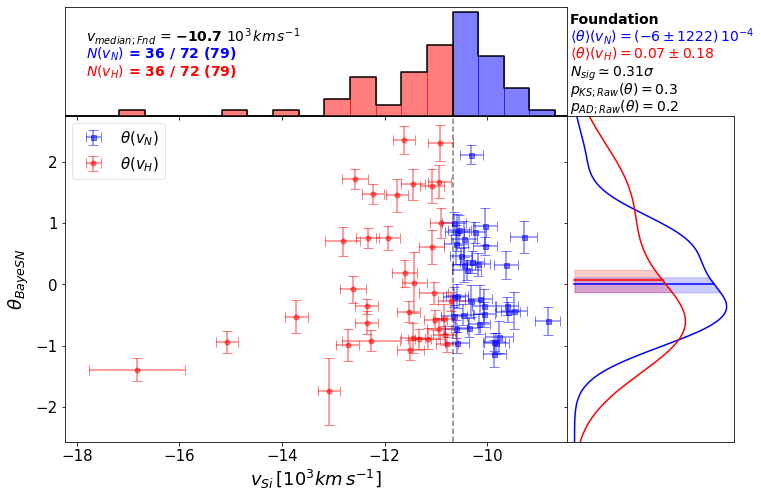

In [13]:
swapaxes='n'
#swapaxes='y'
plot_velocity_feature(Total,'theta','n',LRcolours)
#plot_velocity_feature(Total,'gz_int','n',LRcolours)
#plot_velocity_feature(Total,'salt2_x1','y',LRcolours)

### Load up pre-computed p-value df

In [14]:
#In this cell we create pval_df, which has a column of features and their associated pvalues 
#Note: split on median, Nkept can still be odd
#Consider that there is Ntotal==odd and Nmedian=2, 
#thus removing median from sample returns an odd number thus odd/even sub-samples
features = list(Total.columns.values)
for element in ['SN','vsi','vsi_err']:
    with suppress(ValueError):#when we re-run cell item may already be removed
        features.remove(element)
#print (Total.columns.values)
#print (features)


#Total.head()
#pval_df  = pd.DataFrame(columns=['feature', 'pks_raw', 'pad_raw','Nkept']) 
#pval_df.loc[0] = ['Total_N_SNe',1,0.25,Total.shape[0]]

pval_df    = pd.read_pickle(loc+'%s_%s_%s_pvaldf_total'%(mode,frame,mw))
#pval_df    = pd.read_pickle('%s_%s_%s_pvaldf_total'%(mode,frame,mw))
#mask = [feature in Total.columns.values or feature[:-6] in Total.columns.values for feature in pval_df['feature'].values]
#pval_df = pval_df[mask]
#pval_df.to_pickle(loc+'%s_%s_%s_pvaldf_totalX'%(mode,frame,mw))

pval_df.sort_values(by='pks_raw',ascending=True,inplace=True)        
pval_df


,feature,pks_raw,pad_raw,Nkept
3706,gr_int_t1_-7_t2_-10_vdist,0.0024932,0.001000,72
73740,DM_g_ext_t1_-10_t2_22_vdist,0.0024932,0.006654,72
73738,DM_g_ext_t1_-10_t2_21_vdist,0.0024932,0.006654,72
7461,gr_ext_t1_-4_t2_-7,0.0024932,0.008157,72
8709,gr_ext_t1_-3_t2_-6,0.0024932,0.006010,72
...,...,...,...,...
64106,DM_g_int_t1_7_t2_16_vdist,1,0.250000,72
64102,DM_g_int_t1_7_t2_14_vdist,1,0.250000,72
64038,DM_g_int_t1_6_t2_15_vdist,1,0.250000,72
33706,gr_int_t1_17_t2_16_vdist,1,0.250000,72


In [15]:
#This cell takes raw pvalues and picks out those below a threshold
pval_df    = pd.read_pickle(loc+'%s_%s_%s_pvaldf_total'%(mode,frame,mw))
inspect_df = pval_df.copy()
    
p_thresh   = 0.01
inspect_df = inspect_df[inspect_df['pks_raw']<p_thresh]
display(inspect_df)


def featurename(feat): return feat[:-6] if feat[-6:]=='_vdist' else feat
def swapmap(feat):     return 'y'       if feat[-6:]=='_vdist' else 'n' 

Nplot = 10
#for feature in inspect_df['feature'].values[:Nplot]:
#    plot_velocity_feature(Total,featurename(feature),swapmap(feature),LRcolours)

,feature,pks_raw,pad_raw,Nkept
3706,gr_int_t1_-7_t2_-10_vdist,0.0024932,0.001000,72
73740,DM_g_ext_t1_-10_t2_22_vdist,0.0024932,0.006654,72
73738,DM_g_ext_t1_-10_t2_21_vdist,0.0024932,0.006654,72
7461,gr_ext_t1_-4_t2_-7,0.0024932,0.008157,72
8709,gr_ext_t1_-3_t2_-6,0.0024932,0.006010,72
...,...,...,...,...
77178,DM_r_ext_t1_-2_t2_0_vdist,0.00590317,0.005684,72
65912,DM_r_int_t1_-5_t2_4_vdist,0.00590317,0.005684,72
66080,DM_r_int_t1_-3_t2_1_vdist,0.00590317,0.005684,72
7485,gr_ext_t1_-4_t2_-6,0.00590317,0.009124,72


In [16]:
#In this cell we can choose colour/time range to inspect
def create_pvaldf_filtered(features,swapaxes,bands,intext,timestyle,times):
    mask = []
    for feature in features:
        bbool = True
        try:
            ###################################
            if swapaxes=='n':
                bbool*= feature[-6:]!='_vdist'
            elif swapaxes=='y':
                bbool*= feature[-6:]=='_vdist'
            ###################################
            if bands!='any':
                bbool*=bool(re.match(bands,feature))
            ###################################
            if intext in ['int','ext']:
                bbool*=bool(re.search(intext,feature))
            ###################################
            if feature[:2]!='M_':#For declines or colours
                t1,t2 = feature_to_tpair(feature)[:]
                if timestyle=='single':
                    bbool*= t1==t2 and t1 == times
                elif timestyle=='range':
                    for _ in range(2):
                        bbool*= times[0]<=t1 and times[0]<=t2
                        bbool*= times[1]>=t1 and times[1]>=t2
                elif timestyle=='delay':
                    bbool*= t2-t1==times
            ####################################
            else:#For M_ estimates 
                t1,null = feature_to_tpair(feature)[:]
                if timestyle=='single':
                    bbool*= t1 == times
                elif timestyle=='range':
                    for _ in range(2):
                        bbool*= times[0]<=t1 and t1<=times[1]
                elif timestyle=='delay':
                    print ('Not valid')
                    error=1/0
            mask.append(bool(bbool))
            ##################################
        except:
            mask.append(False)
        #print (feature, bool(bbool))
    return mask
        

### Create p-value Heatmaps

Colour: gr


/opt/ioa/software/anaconda/anaconda36/envs/20200824_py36/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


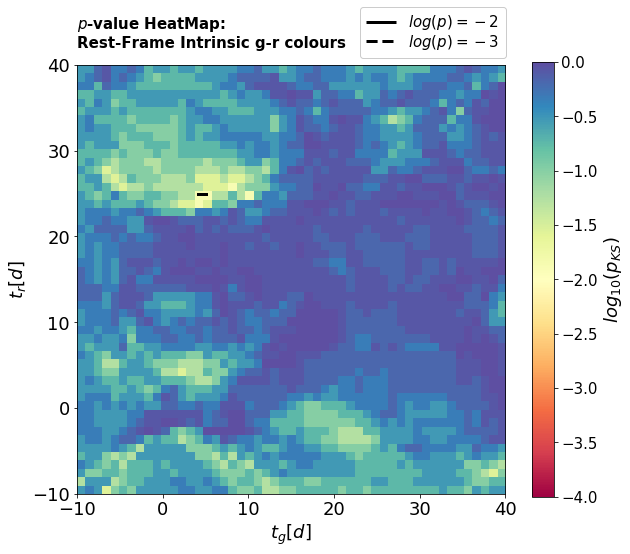

Colour: gr


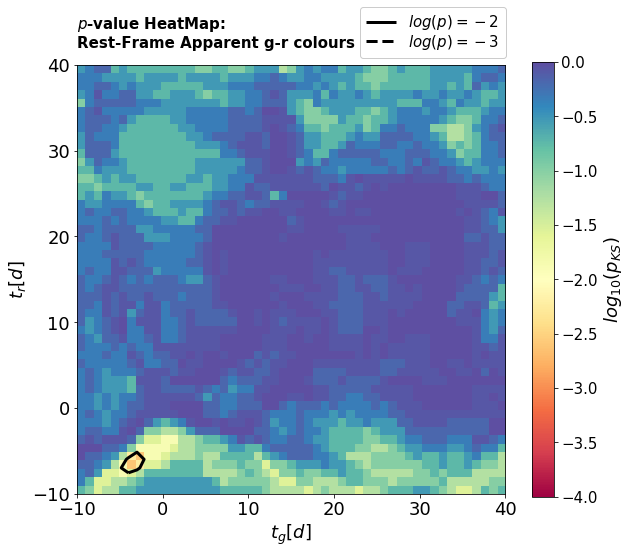

Colour: gr


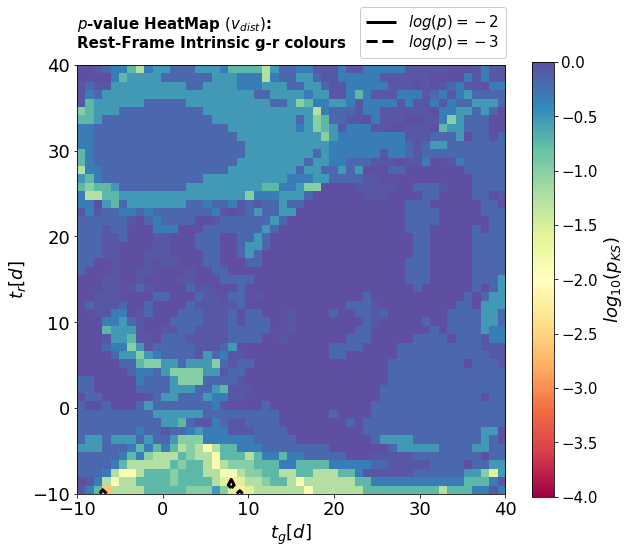

Colour: gr


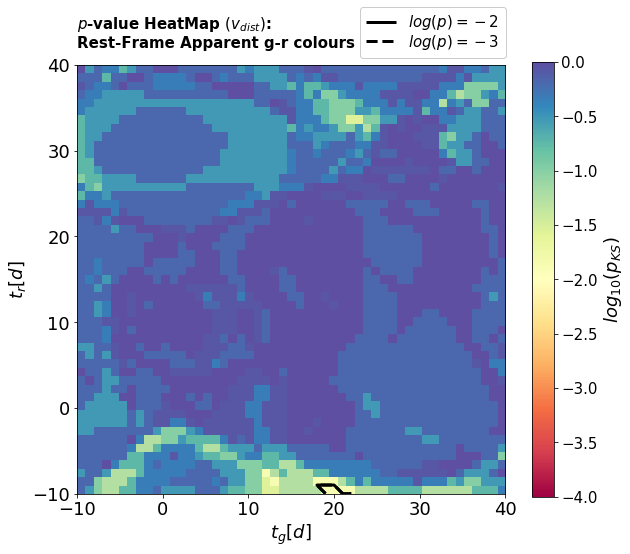

In [17]:
import matplotlib.pyplot as pl
import matplotlib.ticker as ticker
import matplotlib.colors as colors
import matplotlib.colors

def plot_heatmap_colours(df,swapaxes,intext,feature):  
    f=0.8
    FS=18
    pl.figure(figsize=(12*f,10*f))
    dustmap = {'int':'Intrinsic','ext':'Apparent'}
    if swapaxes=='n':
        TITLE ='$p$-value HeatMap: \n%s-Frame %s %s-%s colours'%(frame.capitalize(),dustmap[intext],feature[0],feature[1]) 
    if swapaxes=='y':
        TITLE ='$p$-value HeatMap $(v_{dist})$: \n%s-Frame %s %s-%s colours'%(frame.capitalize(),dustmap[intext],feature[0],feature[1])
    pl.title(TITLE,
            weight='bold',fontsize=15,y=1.03,x=0,
            fontdict={'horizontalalignment':'left'})
        
    nx,ny = int(len(tlist)),int(len(tlist))
    x0,x1 = min(tlist),max(tlist)
    y0,y1 = x0,x1
    dx = (x1-x0)/(nx-1)
    dy = (y1-y0)/(ny-1)
    xs = np.linspace(x0,x1,nx)
    ys = np.linspace(y0,y1,ny)
    
    data = np.zeros((len(xs),len(ys)))
    for ix,x in enumerate(xs):
        for iy,y in enumerate(ys):
            try:
                t1,t2 = int(x),int(y)
                FEATURE = feature+'_'+intext+'_t1_'+str(t1)+'_t2_'+str(t2)
                if swapaxes=='y':
                    FEATURE+='_vdist'
                pks = df[df['feature']==FEATURE]['pks_raw'].values[0]
                data[ix,iy] = np.log10(pks)
            except IndexError:#e.g. declines dont allow t1==t2
                continue
    
    ######################################
    plotlegend='y'#'n'
    for ij,j in enumerate([-2,-3]):
        #if np.amin(data)<j:
            #continue
            #plotlegend='y'
            CS= pl.contour(xs,ys,np.transpose(data) ,[j] ,colors=['black','black'][ij],
                           linewidths=3,linestyles=['-','--'][ij])
            CS.collections[0].set_label(r'$log(p) = %s$'%j)
    ######################################
    im = pl.imshow(np.transpose(data),
    extent =(x0,x1,y0,y1),
    origin = "lower",
    cmap = matplotlib.cm.Spectral)#terrain,ocean,Blues,magma,inferno,viridis,BrBG
    pl.xlabel(r'$t_{%s} [d]$'%feature[0],fontsize=FS)
    pl.ylabel(r'$t_{%s} [d]$'%feature[1],fontsize=FS)
    pl.tick_params(labelsize=FS)
    #pl.tight_layout()
    cbar = pl.colorbar(im, orientation='vertical')#,label = 'Bias')#,labelsize=18)
    cbar.ax.tick_params(labelsize=15)
    cbar.set_label(r"$log_{10}(p_{KS})$", size=18)
    
    if plotlegend=='y':
        pl.legend(fontsize=15,framealpha=1,loc='lower right', bbox_to_anchor=(1.01775, 1),
                 labelspacing=0.05)
    
    clo,chi=-4,0
    pl.clim(clo,chi)
    #cbar.ax.set_yticklabels(np.arange(clo,chi,0.5))
    plotmodemap = {'c':'Colours','dm':'Declines','M_LCDM':'Mags','M_BYSN':'Mags'}
    plotname = feature+'_'+intext
    
    with suppress(FileNotFoundError):
        if swapaxes=='n':
            pl.savefig('/PATH/TO/DIRECTORY/%s/%s/%s/%s'%(mode,'Colours',intext.capitalize(),plotname))
        elif swapaxes=='y':
            pl.savefig('/PATH/TO/DIRECTORY/%s/%s/%s/Velocity/%s'%(mode,'Colours',intext.capitalize(),plotname))
    pl.show()

###Choose mask here
#(c_or_vdist = ['n','y','null'],bands=['DM_B','M_B','BV','any'],intext=['int','ext','null'],
#                                                   timestyle=['single','range','delay'],times=t or (t1,t2))


plotcolours ='n'
plotcolours ='y'

if plotcolours=='y':
    for swapaxes in ['n','y']:
        for intext in ['int','ext']:
            for fpair in fpairs:
                print ('Colour:', fpair)
                mask = create_pvaldf_filtered(pval_df['feature'].tolist(),swapaxes,fpair,intext,'range',(-10,40))
                inspect_colours = pval_df[mask].copy()
                #display(inspect_colours)
                plot_heatmap_colours(inspect_colours,swapaxes,intext,fpair)



#mask = create_pvaldf_filtered(pval_df['feature'].tolist(),'null','BV','null','single',0)
#mask = create_pvaldf_filtered(pval_df['feature'].tolist(),'n','DM_V','int','range',(-10,40))
#mask = create_pvaldf_filtered(pval_df['feature'].tolist(),'null','DM_V','int','range',(-10,5))
#mask = create_pvaldf_filtered(pval_df['feature'].tolist(),'n','BV','int','delay',-5)
#inspect_colours = pval_df[mask].copy()
#inspect_colours = inspect_colours[inspect_colours['pks_raw']<p_thresh]
#display(inspect_colours)
#for feature in inspect_colours['feature'].values:
#    plot_velocity_feature(Total,featurename(feature),swapmap(feature))

Filter: g


/opt/ioa/software/anaconda/anaconda36/envs/20200824_py36/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


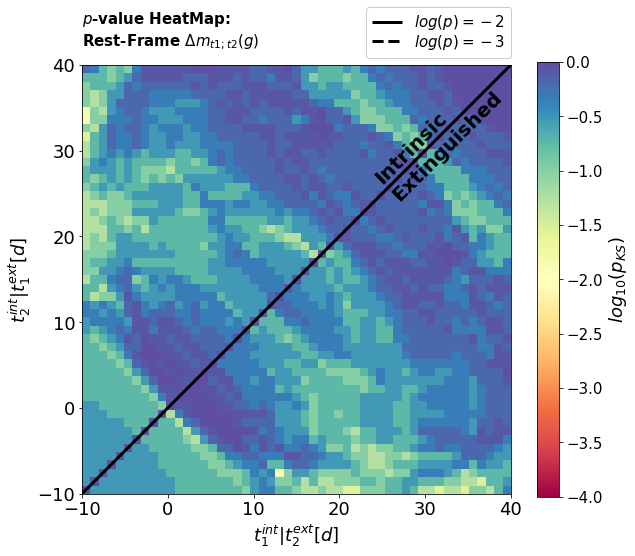

Filter: r


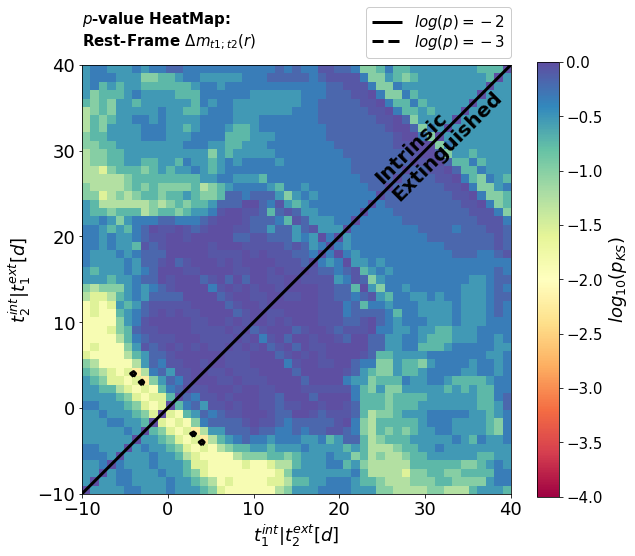

Filter: g


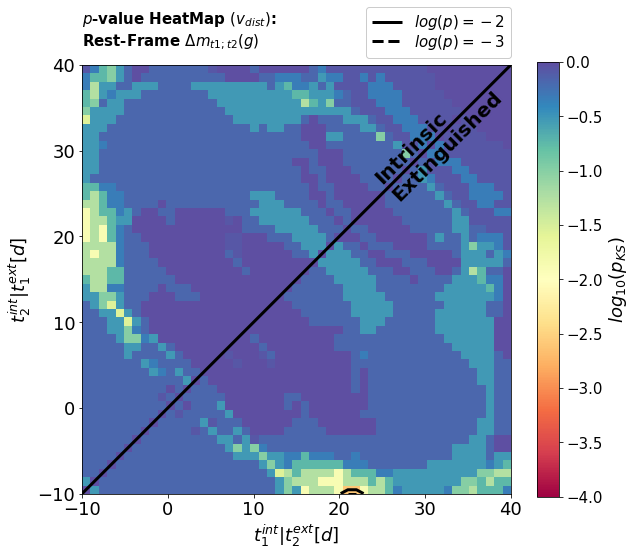

Filter: r


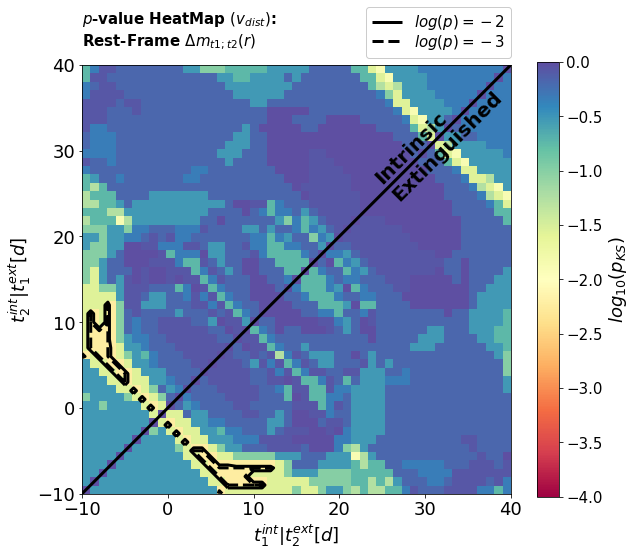

In [18]:
def plot_heatmap_declines(pval_df,swapaxes,feature):  
    f=0.8
    FS=18
    pl.figure(figsize=(12*f,10*f))
    dustmap = {'int':'Intrinsic','ext':'Extinguished'}
    if swapaxes=='n':
        TITLE ='$p$-value HeatMap: \n%s-Frame $\Delta m_{t1;t2}(%s)$'%(frame.capitalize(),feature[-1]) 
    if swapaxes=='y':
        TITLE ='$p$-value HeatMap $(v_{dist})$: \n%s-Frame $\Delta m_{t1;t2}(%s)$'%(frame.capitalize(),feature[-1]) 
    pl.title(TITLE,
             weight='bold',fontsize=15,y=1.03,x=0,
            fontdict={'horizontalalignment':'left'})
    
    xx,yy = 25,26
    dd=1
    pl.text(xx,yy, 'Intrinsic', fontsize=20,color='black',weight='bold',
              rotation=45, rotation_mode='anchor')
    pl.text(yy+dd,xx-dd, 'Extinguished', fontsize=20,color='black',weight='bold',
              rotation=45, rotation_mode='anchor')

    nx,ny = int(len(tlist)),int(len(tlist))
    x0,x1 = min(tlist),max(tlist)
    y0,y1 = x0,x1
    dx = (x1-x0)/(nx-1)
    dy = (y1-y0)/(ny-1)
    xs = np.linspace(x0,x1,nx)
    ys = np.linspace(y0,y1,ny)

    data = np.zeros((len(xs),len(ys)))
    #########################
    for intext in ['int','ext']:
        mask = create_pvaldf_filtered(pval_df['feature'].tolist(),swapaxes,f'DM_{feature}',intext,'range',(-10,40))
        df = pval_df[mask].copy()
    
        for ix,x in enumerate(xs):
            for iy,y in enumerate(ys):
                    try:                        
                        if intext=='int' and x<y:#Upper left triangle
                            t1,t2 = int(x),int(y)     
                        elif intext=='ext' and x>y:#Bottom Right Triangle
                            t1,t2 = int(y),int(x)
                        else:
                            continue
                        FEATURE = 'DM_'+feature+'_'+intext+'_t1_'+str(t1)+'_t2_'+str(t2)
                        if swapaxes=='y':
                            FEATURE+='_vdist'
                        pks = df[df['feature']==FEATURE]['pks_raw'].values[0]
                        data[ix,iy] = np.log10(pks)
                    except IndexError:#e.g. declines dont allow t1==t2
                        continue
    ######################################
    
    
    
    
    plotlegend='y'#'n'
    for ij,j in enumerate([-2,-3]):
        #if np.amin(data)<j:
            #continue
            #plotlegend='y'
            CS= pl.contour(xs,ys,np.transpose(data) ,[j] ,colors=['black','black'][ij],
                           linewidths=3,linestyles=['-','--'][ij])
            CS.collections[0].set_label(r'$log(p) = %s$'%j)
    ######################################
    
    im = pl.imshow(np.transpose(data),
    extent =(x0,x1,y0,y1),
    origin = "lower",
    cmap = matplotlib.cm.Spectral)#terrain,ocean,Blues,magma,inferno,viridis
    pl.xlabel(r'$t^{int}_{1} | t^{ext}_{2} [d]$',fontsize=FS)
    pl.ylabel(r'$t^{int}_{2} | t^{ext}_{1} [d]$',fontsize=FS)
    pl.tick_params(labelsize=FS)
    #pl.tight_layout()
    cbar = pl.colorbar(im, orientation='vertical')#,label = 'Bias')#,labelsize=18)
    cbar.ax.tick_params(labelsize=15)
    cbar.set_label(r"$log_{10}(p_{KS})$", size=18)
    #pl.scatter(tlist,tlist,color='black',marker='s',s=2)
    pl.plot(tlist,tlist,color='black',linewidth=3)
    
    if plotlegend=='y':
        pl.legend(fontsize=15,framealpha=1,loc='lower right', bbox_to_anchor=(1.01775, 1),
                 labelspacing=0.05)
    
    clo,chi=-4,0
    pl.clim(clo,chi)
    #cbar.ax.set_yticklabels(np.arange(clo,chi,0.5))
    plotmodemap = {'c':'Colours','dm':'Declines','M_LCDM':'Mags','M_BYSN':'Mags'}
    plotname = 'DM_'+feature
    
    with suppress(FileNotFoundError):
        if swapaxes=='n':
            pl.savefig('/PATH/TO/DIRECTORY/%s/Declines/%s'%(mode,plotname))
        elif swapaxes=='y':
            pl.savefig('/PATH/TO/DIRECTORY/%s/Declines/Velocity/%s'%(mode,plotname))
    pl.show()

    

plotdeclines='n'
plotdeclines='y'

    
if plotdeclines=='y':
    for swapaxes in ['n','y']:
        for f in filters:
            #########################
            print ('Filter:', f)
            #########################
            plot_heatmap_declines(pval_df,swapaxes,f)

Filter: g


/opt/ioa/software/anaconda/anaconda36/envs/20200824_py36/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


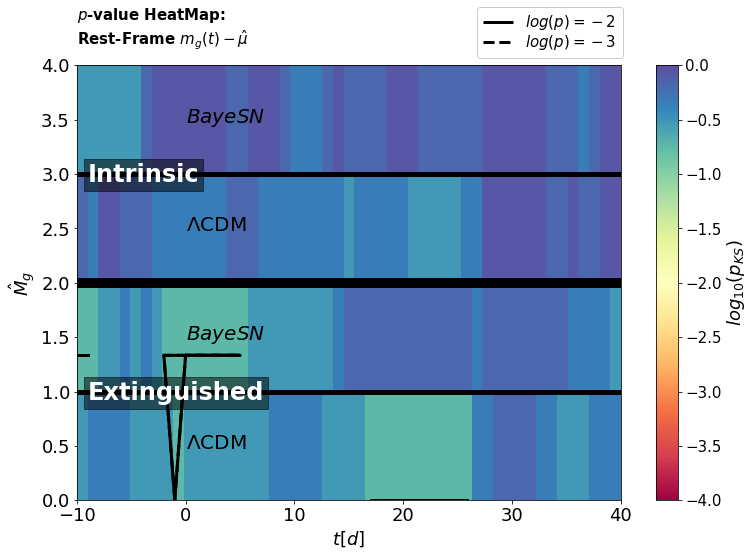

Filter: r


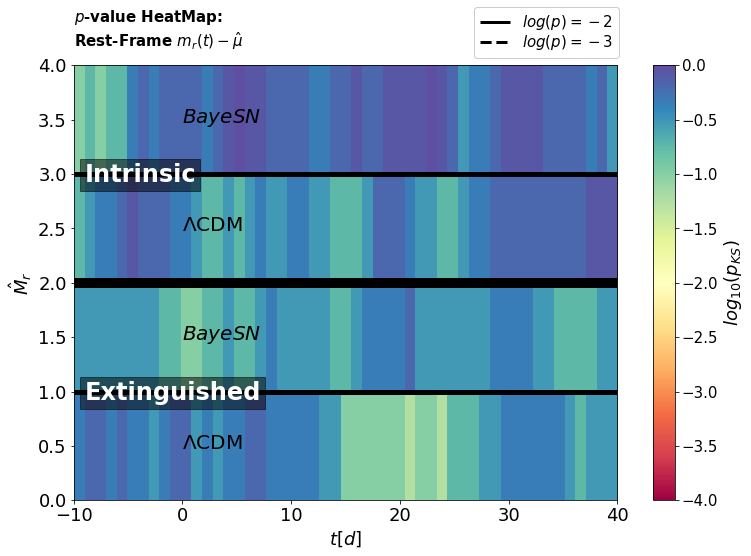

Filter: g


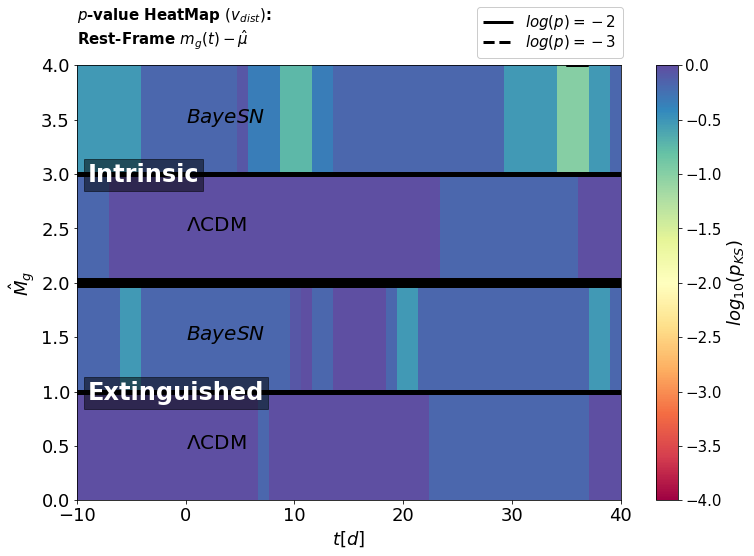

Filter: r


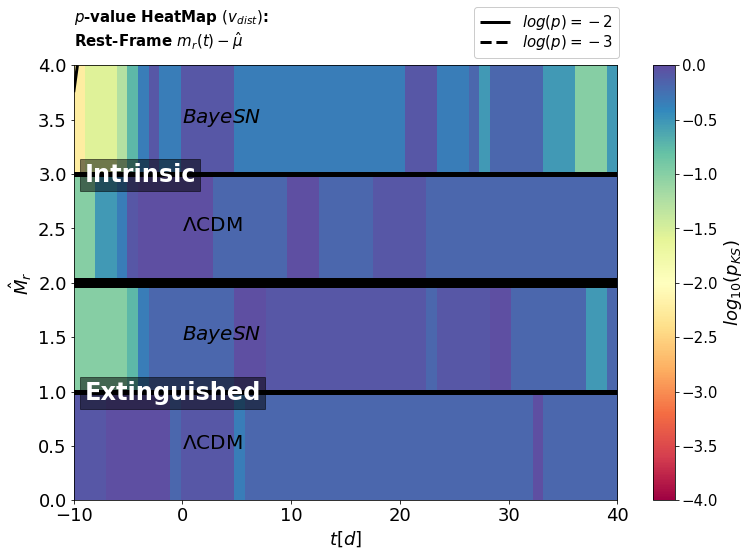

In [19]:
def get_intext_mu(y):
    if y<2:
        intext='int'
    else:
        intext='ext'
    if y%2==0:
        mu_method = 'BYSN'
    else:
        mu_method = 'LCDM'
    return intext,mu_method


def plot_heatmap_mags(pval_df,swapaxes,feature):  
    f=0.8
    FS=18
    pl.figure(figsize=(16*f,10*f))
    dustmap = {'int':'Intrinsic','ext':'Extinguished'}
    if swapaxes=='n':
        TITLE ='$p$-value HeatMap: \n%s-Frame $m_{%s}(t)-\hat{\mu}$'%(frame.capitalize(),feature[-1]) 
    if swapaxes=='y':
        TITLE ='$p$-value HeatMap $(v_{dist})$: \n%s-Frame $m_{%s}(t)-\hat{\mu}$'%(frame.capitalize(),feature[-1]) 
    pl.title(TITLE,
             weight='bold',fontsize=15,y=1.03,x=0,
            fontdict={'horizontalalignment':'left'})
    
    
    nx,ny = int(len(tlist)),4#int(len(tlist))
    x0,x1 = min(tlist),max(tlist)
    y0,y1 = 0,4
    dx = (x1-x0)/(nx-1)
    dy = 1
    xs = np.linspace(x0,x1,nx)
    ys = np.linspace(y0,y1,ny)

    data = np.zeros((len(xs),len(ys)))
    #########################
    ddd=0.025
    for iy,y in enumerate(ys):
        intext,mu_method = get_intext_mu(iy)
        mask = create_pvaldf_filtered(pval_df['feature'].tolist(),swapaxes,f'M_{feature}',intext,'range',(-10,40))
        df = pval_df[mask].copy()
        mumap = {'BYSN':r'$BayeSN$','LCDM':r'$\Lambda$CDM'}
        pl.text(0,4-iy-0.5-ddd,mumap[mu_method],fontsize=20,color='black')#,weight='bold')#,bbox=dict(facecolor='black',alpha=0.5))
        for ix,x in enumerate(xs):
            t1 = str(int(x))  
            FEATURE = 'M_'+feature+'_'+mu_method+'_'+intext+'_t1_'+str(t1)
            if swapaxes=='y':
                FEATURE+='_vdist'
            pks = df[df['feature']==FEATURE]['pks_raw'].values[0]
            data[ix,iy] = np.log10(pks)
    dd=0.075
    pl.text(-9,3-dd,r'Intrinsic',fontsize=24,color='white',weight='bold',bbox=dict(facecolor='black',alpha=0.5))
    pl.text(-9,1-dd,r'Extinguished',fontsize=24,color='white',weight='bold',bbox=dict(facecolor='black',alpha=0.5))
    ######################################    
    plotlegend='y'#'n'
    for ij,j in enumerate([-2,-3]):
        #if np.amin(data)>j:
        #    continue
        CS= pl.contour(xs,ys,np.transpose(data) ,[j] ,colors=['black','black'][ij],
                       linewidths=3,linestyles=['-','--'][ij])
        CS.collections[0].set_label(r'$log(p) = %s$'%j)
    ######################################
    for i in range(1,4):
        pl.plot(tlist,np.ones(len(tlist))*(i),color='black',linestyle='-',linewidth=5)
    pl.plot(tlist,np.ones(len(tlist))*2,color='black',linestyle='-',linewidth=10)
    im = pl.imshow(np.transpose(data),
    extent =(x0,x1,y0,y1),
    origin = "lower",
    cmap = matplotlib.cm.Spectral,
    aspect=10)#terrain,ocean,Blues,magma,inferno,viridis
    pl.xlabel(r'$t [d]$',fontsize=FS)
    pl.ylabel(r'$\hat{M}_{%s}$'%feature,fontsize=FS)
    pl.tick_params(labelsize=FS)
    #pl.yticks([])
    
    #pl.tight_layout()
    cbar = pl.colorbar(im, orientation='vertical')#,label = 'Bias')#,labelsize=18)
    cbar.ax.tick_params(labelsize=15)
    cbar.set_label(r"$log_{10}(p_{KS})$", size=18)
    
    if plotlegend=='y':
        pl.legend(fontsize=15,framealpha=1,loc='lower right', bbox_to_anchor=(1.01775, 1),
                 labelspacing=0.05)
    
    clo,chi=-4,0
    pl.clim(clo,chi)
    #cbar.ax.set_yticklabels(np.arange(clo,chi,0.5))
    plotname = 'M_'+feature
    with suppress(FileNotFoundError):
        if swapaxes=='n':
            pl.savefig('/PATH/TO/DIRECTORY/%s/Mags/%s'%(mode,plotname))
        elif swapaxes=='y':
            pl.savefig('/PATH/TO/DIRECTORY/%s/Mags/Velocity/%s'%(mode,plotname))
    pl.show()






plotmags    ='n'
plotmags    ='y'
    
if plotmags=='y':
    for swapaxes in ['n','y']:
        for f in filters:
            #########################
            print ('Filter:', f)
            #########################
            plot_heatmap_mags(pval_df,swapaxes,f)